In [ ]:
# In this script we want to solve the system of odes for assembling two 3-membered rings  
# with synthesis and degradation NOT included 
# Name: Leo Lagunes and Paige M.
# Date: 07/14/21 

# Last update: 03/08/22

# IMPORTANT NOTE: The equations were written and developed by Drs. Eric Deeds and Koan Briggs, this code was developed by LL + PM

# Running in python because Julia hasn't really been working just yet


In [15]:
# ---------------------------------------------------
# --- packages to use ---
# ---------------------------------------------------

# First we need to import all of the packages we will be using!\n",
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [35]:
# ---------------------------------------------------
# --- example form EJD ---
# ---------------------------------------------------

# First model: no synthesis and degradation
# This is the definition of our system of ODEs for the model
def first_model(states,t): 
    # Our \"states\" list has the state variables in the following order:",
    # S, KS, Sstar, PSstar, K, P\n",
    S = states[0]
    KS = states[1]
    Sstar = states[2]
    PSstar = states[3]
    P = states[5]
    K = states[4]
    # The above just makes it easier to relate our ODEs to the ones in the Homework text
    S_prime = -k_plus*S*K + k_minus*KS + k_cat*PSstar
    KS_prime = k_plus*S*K - k_minus*KS - k_cat*KS
    Sstar_prime = -k_plus*Sstar*P + k_minus*PSstar + k_cat*KS
    PSstar_prime = k_plus*Sstar*P - k_minus*PSstar - k_cat*PSstar
    K_prime = -k_plus*S*K + k_minus*KS + k_cat*KS
    P_prime = -k_plus*Sstar*P + k_minus*PSstar + k_cat*PSstar
    states_prime = [S_prime,KS_prime,Sstar_prime,PSstar_prime,K_prime,P_prime]
    
    return states_prime

def michMenten(states, t):
    # the MM model as a second example
    # Our \"states\" list has the state variables in the following order:",
    # S, E, ES, P, kon, koff, kcat 
    S = states[0]
    E = states[1]
    ES = states[2]
    P = states[3]
    
    #kOn = states[4]
    #kOff = states[5]
    #kCat = states[6]
    # list of odes
    S_prime = -kOn*E*S + kOff*ES
    E_prime = -kOn*E*S + (kOff+kCat)*ES
    ES_prime = kOn*E*S - (kOff + kCat)*ES
    P_prime = kCat*ES
    
    states_prime = [S_prime, E_prime, ES_prime, P_prime]
    
    return states_prime
    

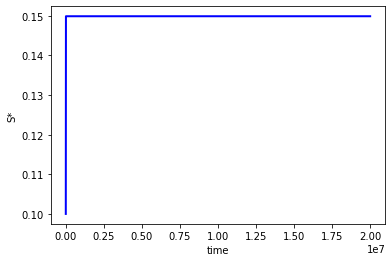

In [32]:
# ---------------------------------------------------
# --- example form EJD ---
# ---------------------------------------------------

# PARAMETERS\n",
# This is where we will define the parameters that we won't change for our model\n",
k_cat = 1
k_minus = 0.1
k_plus = .1

S_0 = .001
KS_0 = 0.1
Sstar_0 = 0.1
PSstar_0 = 0.1
P_0 = 0.001
K_0 = 0.002

states_0 = [S_0,KS_0,Sstar_0,PSstar_0,K_0,P_0]

# To intgrate ODEs, we need a \"t\" vector for time
# Note that the units on \"t\" are in seconds
# We choose a very long maximum time (20,000,000 seconds!) to insure we reach steady-state
t = np.linspace(0,20000000,2000)
# Now, integrate the ODEs and put the results in \"solution\"
solution = odeint(first_model,states_0,t)
    
plt.plot(t,solution[:,2],'b-',linewidth=2)
plt.xlabel('time')
plt.ylabel('S*')
plt.show()  
    
    
    
    
    

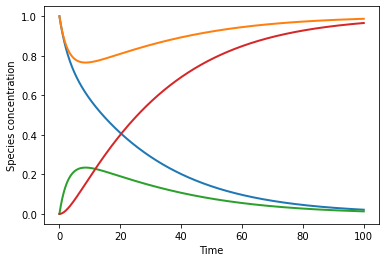

In [42]:
# ---------------------------------------------------
# --- Michaelis-Menten example ---
# ---------------------------------------------------

# PARAMETER VALUES
kOn = 0.1
kOff = 0.1
kCat = 0.1
S_0 = 1.0
E_0 = 1.0
ES_0 = 0.0 
P_0 = 0.0

states_1 = [S_0,E_0, ES_0,P_0 ]

# --- Solve ODE's with fixed parameters ---
t = np.linspace(0,100,2000)
solution = odeint(michMenten,states_1,t)

plt.plot(t,solution,'-',linewidth=2)
plt.xlabel('Time')
plt.ylabel('Species concentration')
plt.show()


In [ ]:
# ---------------------------------------------------
# --- Stacked rings ---
# ---------------------------------------------------

# Now that I know the examples work, lets try the stacked rings code 
